In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline


In [ ]:
data1 = np.loadtxt("../build/random_num_list.txt")
data = data1[0:2000]
N = len(data)
x = np.zeros((N))
y = np.zeros(N)
z = np.zeros(N)

fig = plt.figure(figsize=(5, 5)) # change view of angle
ax = fig.add_subplot(projection='3d')
for i in range(0,N-2,3):
    x[i] = data[i]
    y[i] = data[i+1]
    z[i] = data[i+2]
ax.scatter(x,y,z)
plt.show()

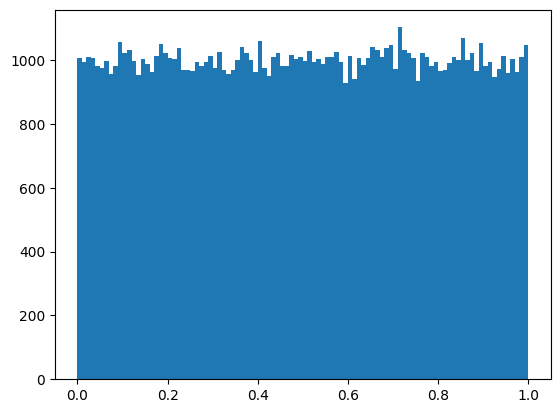

In [11]:
plt.hist(data1,100)
plt.show()

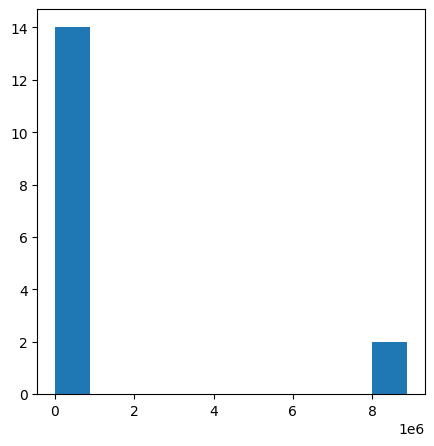

In [32]:
data = np.loadtxt("../build/Boltzman_verteilung_2x2_Mat.txt")
fig = plt.figure(figsize=(5, 5)) # change view of angle
plt.hist(data)
plt.show()

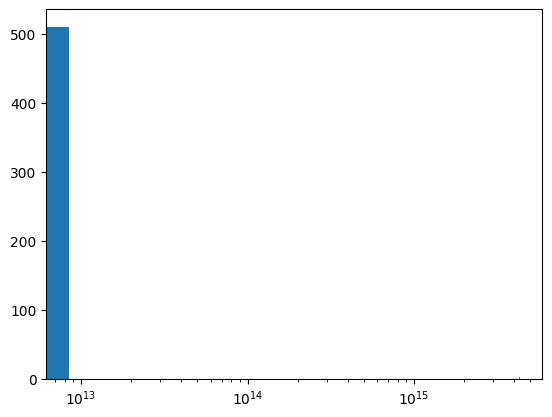

In [126]:
data = np.loadtxt("../build/Boltzman_verteilung_3x3_Mat.txt")
#fig = plt.figure(figsize=(5, 5)) # change view of angle
data = np.sort(data)
plt.hist(data,bins=512)
#plt.yscale('log')
plt.xscale('log')
plt.show()

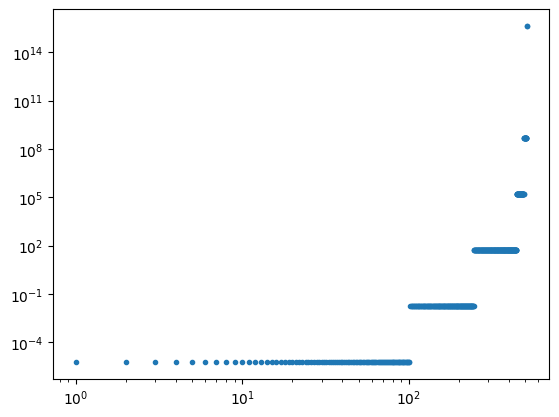

In [127]:
plt.plot(data,'.')
plt.xscale('log')
plt.yscale('log')
plt.show()

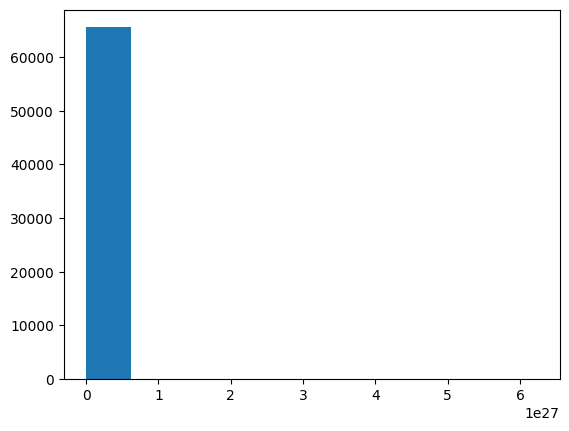

In [120]:
data = np.loadtxt("../build/Boltzman_verteilung_4x4_Mat.txt")
data = np.sort(data)
plt.hist(data)
plt.show()


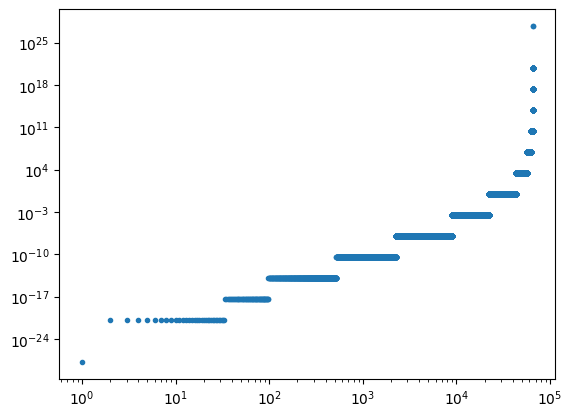

In [124]:
plt.plot(data,'.')
plt.yscale('log')
plt.xscale('log')
plt.show()

In [ ]:
data = np.loadtxt("../build/Energy.txt")
x = data[:,1]/len(data[:,1])
plt.plot(x)


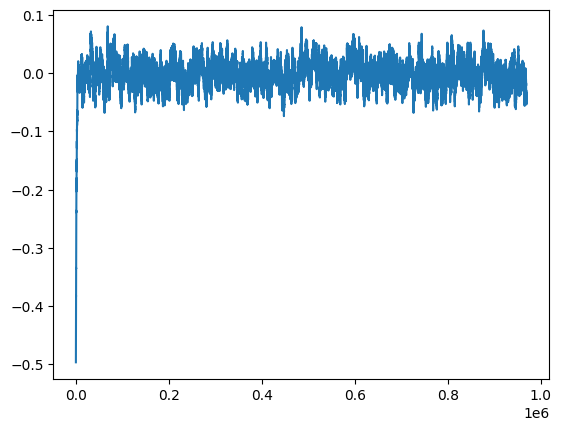

In [61]:
data = np.loadtxt("../build/Energy_2D.txt")
x = data[:,1]/2500
plt.plot(x)

In [26]:
len(data[:,1])

240016

1